## Project Title : Car Price Prediction Project

## Problem Statement:

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model.


## Business Goal:

We need to build a machine learning model. Before model building do all data pre-processing steps. Try different models with different hyper parameters and select the best model.



In [1]:
#importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset,

df = pd.read_excel("UsedCar.xlsx")
df

,Unnamed: 0,Brand,Price,Year,Fuel,Transmission,Running KM,Location
0,0,Mercedes-Benz A Class 2L AMG A35,26925,2018,Petrol,Automatic,8015,London
1,1,Toyota Yaris 1.6L GR Circuit T,26850,2015,Petrol,Automatic,11718,London
2,2,Toyota Yaris 1.6L GR Circuit T,26725,2020,Petrol,Manual,24308,London
3,3,BMW 1 Series 2L M135i,26400,2019,Petrol,Automatic,10849,London
4,4,BMW 1 Series 2L M135i,26375,2018,Petrol,Automatic,21716,London
...,...,...,...,...,...,...,...,...
9975,9975,Mercedes-Benz A Class 1.5L AMG Line A180d,25500,2020,Petrol,Automatic,11605,London
9976,9976,Mercedes-Benz A Class 1.3L AMG Line A180,25500,2020,Petrol,Automatic,8307,London
9977,9977,Mercedes-Benz A Class 1.3L AMG Line A200,25425,2019,Petrol,Automatic,2743,London
9978,9978,Mercedes-Benz A Class 1.5L AMG Line A180d,25425,2020,Electric,Automatic,11250,London


Total we have 9980 rows and 8 columns in a dataset

In [3]:
#dropping unwanted columns as it will not have any impact,
df = df.drop(columns = ['Unnamed: 0'], axis = 1)
df.head()

,Brand,Price,Year,Fuel,Transmission,Running KM,Location
0,Mercedes-Benz A Class 2L AMG A35,26925,2018,Petrol,Automatic,8015,London
1,Toyota Yaris 1.6L GR Circuit T,26850,2015,Petrol,Automatic,11718,London
2,Toyota Yaris 1.6L GR Circuit T,26725,2020,Petrol,Manual,24308,London
3,BMW 1 Series 2L M135i,26400,2019,Petrol,Automatic,10849,London
4,BMW 1 Series 2L M135i,26375,2018,Petrol,Automatic,21716,London


unnamed column has no use in the dataset so we dropped that column from a dataset

In [4]:
# cheking infpormation of the each column in dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9980 entries, 0 to 9979
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9980 non-null   object
 1   Price         9980 non-null   int64 
 2   Year          9980 non-null   int64 
 3   Fuel          9980 non-null   object
 4   Transmission  9980 non-null   object
 5   Running KM    9980 non-null   int64 
 6   Location      9980 non-null   object
dtypes: int64(3), object(4)
memory usage: 545.9+ KB


information o f the datset tells there are no null values present in a dataset and total 9980 rows and 7 columns in a dataset and dtype of dataset is int type-1 and object type are 6

In [5]:
# Checking is there any null values present in dataset

df.isnull().sum()

Brand           0
Price           0
Year            0
Fuel            0
Transmission    0
Running KM      0
Location        0
dtype: int64

no null values in a datset

<AxesSubplot:>

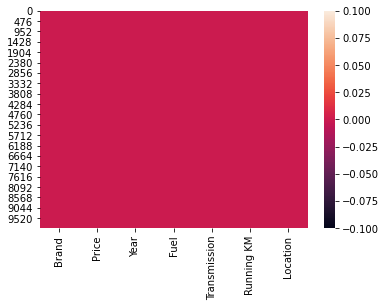

In [6]:
#now check null with heatmap

sns.heatmap(df.isnull())

# EDA

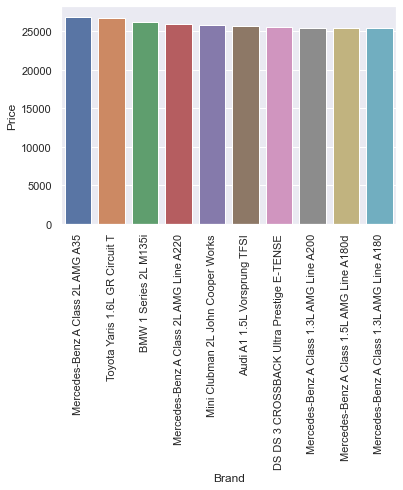

In [7]:
#let’s visualize the barplot of brand,price using Seaborn
sns.set_theme()
sns.barplot(x = 'Brand', y = 'Price', data = df)
plt.xticks(rotation = 90)
plt.show()

Almost all car brands are in demand but among all popular brands,Mercedes,Toyota,BMW, are having high price than other brand cars.

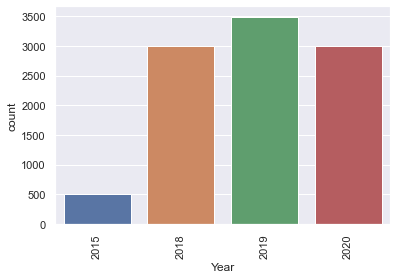

In [8]:
#let's visualize the count of Year using seaborn
sns.set_theme()
sns.countplot(x = df['Year'])
plt.xticks(rotation = 90)
plt.show()

We can see from the below plot that most of the car registered year is from 2018,2019 and 2020.

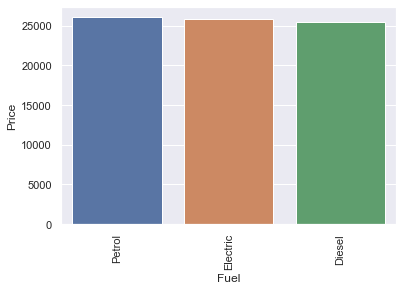

In [9]:
#let's visualize the barplot of fuel,price using seaborn
sns.set_theme()
sns.barplot(x = 'Fuel', y = 'Price', data = df)
plt.xticks(rotation = 90)
plt.show()

most of the cars are having fuel type is Electric,Diesel and petrol.

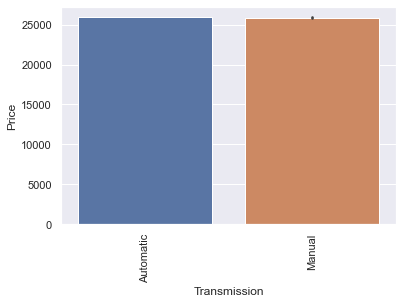

In [10]:
#let's visualize the barplot of Transmission,price using seaborn
sns.set_theme()
sns.barplot(x = 'Transmission', y = 'Price', data = df)
plt.xticks(rotation = 90)
plt.show()

Most of the car transmission type is both Automatic and manual 

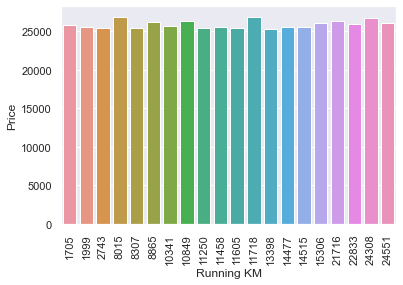

In [11]:
#let's visualize the barplot of Running KM,price using seaborn
sns.set_theme()
sns.barplot(x = 'Running KM', y = 'Price', data = df)
plt.xticks(rotation = 90)
plt.show()

Most of the car transmission type is Automatic and the car which has minimum of > 1700 KM is having price of
> 25000 Euros.


array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Running KM'}>, <AxesSubplot:>]],
      dtype=object)

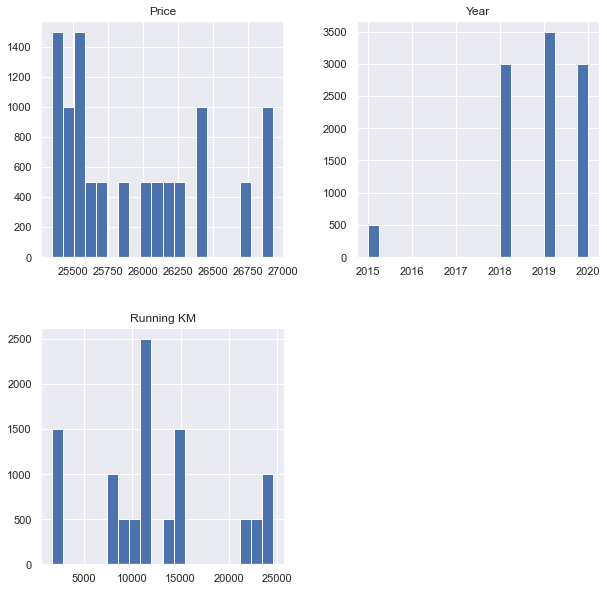

In [12]:
df.hist(bins = 20, figsize = (10,10))

In [13]:
# SPlitting numerical and categorical data

num = df.select_dtypes(exclude = object)
cat = df.select_dtypes(include = object)

In [14]:
# Applying label Encoder to encode categorical into numerical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat = cat.apply(le.fit_transform)

In [15]:
cat

,Brand,Fuel,Transmission,Location
0,6,2,0,0
1,9,2,0,0
2,9,2,1,0
3,1,2,0,0
4,1,2,0,0
...,...,...,...,...
9975,5,2,0,0
9976,3,2,0,0
9977,4,2,0,0
9978,5,1,0,0


In [16]:
num

,Price,Year,Running KM
0,26925,2018,8015
1,26850,2015,11718
2,26725,2020,24308
3,26400,2019,10849
4,26375,2018,21716
...,...,...,...
9975,25500,2020,11605
9976,25500,2020,8307
9977,25425,2019,2743
9978,25425,2020,11250


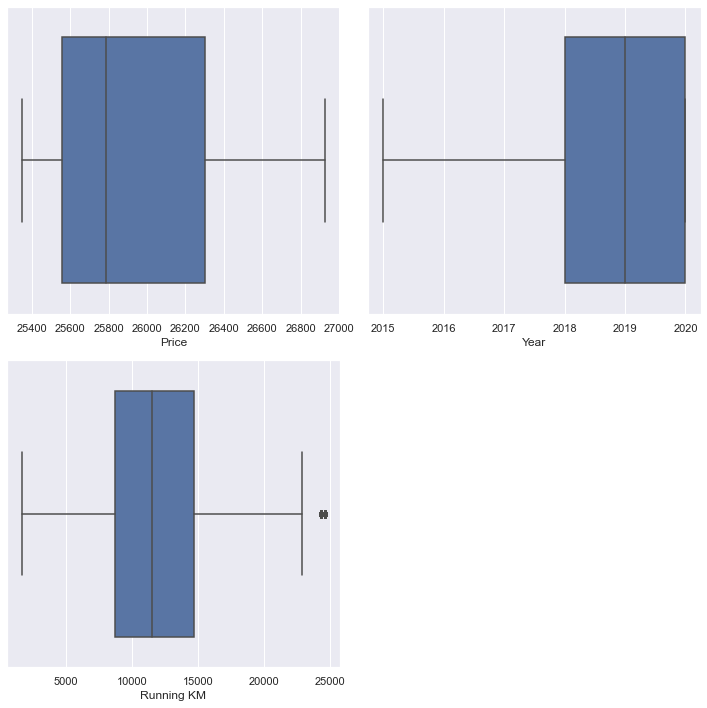

In [17]:
plt.figure(figsize = (10,10))
pltnumber = 1
                                            # boxplot for numerical columns for train dataset
for column in num:
    if pltnumber<=4:
        ax = plt.subplot(2,2,pltnumber)
        sns.boxplot(num[column])
        plt.xlabel(column,fontsize=12)
        pltnumber+=1
plt.tight_layout()

In [18]:
# Merging Numerical and categorical dataset

df1 = pd.concat([num,cat],axis = 1)
df1

,Price,Year,Running KM,Brand,Fuel,Transmission,Location
0,26925,2018,8015,6,2,0,0
1,26850,2015,11718,9,2,0,0
2,26725,2020,24308,9,2,1,0
3,26400,2019,10849,1,2,0,0
4,26375,2018,21716,1,2,0,0
...,...,...,...,...,...,...,...
9975,25500,2020,11605,5,2,0,0
9976,25500,2020,8307,3,2,0,0
9977,25425,2019,2743,4,2,0,0
9978,25425,2020,11250,5,1,0,0


In [19]:
#remove location column froma a datset
df1 = df1.drop(columns = ['Location'], axis = 1)

In [20]:
#Checking the dataset
df1.head()

,Price,Year,Running KM,Brand,Fuel,Transmission
0,26925,2018,8015,6,2,0
1,26850,2015,11718,9,2,0
2,26725,2020,24308,9,2,1
3,26400,2019,10849,1,2,0
4,26375,2018,21716,1,2,0


In [21]:
#Statistical summary of the dataset
df1.describe()

,Price,Year,Running KM,Brand,Fuel,Transmission
count,9980.000000,9980.000000,9980.000000,9980.000000,9980.000000,9980.000000
mean,25946.250000,2018.800000,12497.950000,3.750000,1.550000,0.150000
std,492.548471,1.166249,6623.659527,2.772773,0.668988,0.357089
min,25350.000000,2015.000000,1705.000000,0.000000,0.000000,0.000000
25%,25556.250000,2018.000000,8725.500000,1.000000,1.000000,0.000000
50%,25787.500000,2019.000000,11531.500000,3.500000,2.000000,0.000000
75%,26300.000000,2020.000000,14712.750000,5.250000,2.000000,0.000000
max,26925.000000,2020.000000,24551.000000,9.000000,2.000000,1.000000


In [22]:
#Checking correlation of the dataset
corr=df1.corr()  #corr() function provides the correlation value of each column
corr

,Price,Year,Running KM,Brand,Fuel,Transmission
Price,1.000000,-0.490967,0.322096,0.296804,0.408414,-0.053663
Year,-0.490967,1.000000,0.123664,-0.355661,-0.243550,0.192117
Running KM,0.322096,0.123664,1.000000,0.020006,-0.075783,0.246726
Brand,0.296804,-0.355661,0.020006,1.000000,0.235879,0.189389
Fuel,0.408414,-0.243550,-0.075783,0.235879,1.000000,-0.136060
Transmission,-0.053663,0.192117,0.246726,0.189389,-0.136060,1.000000


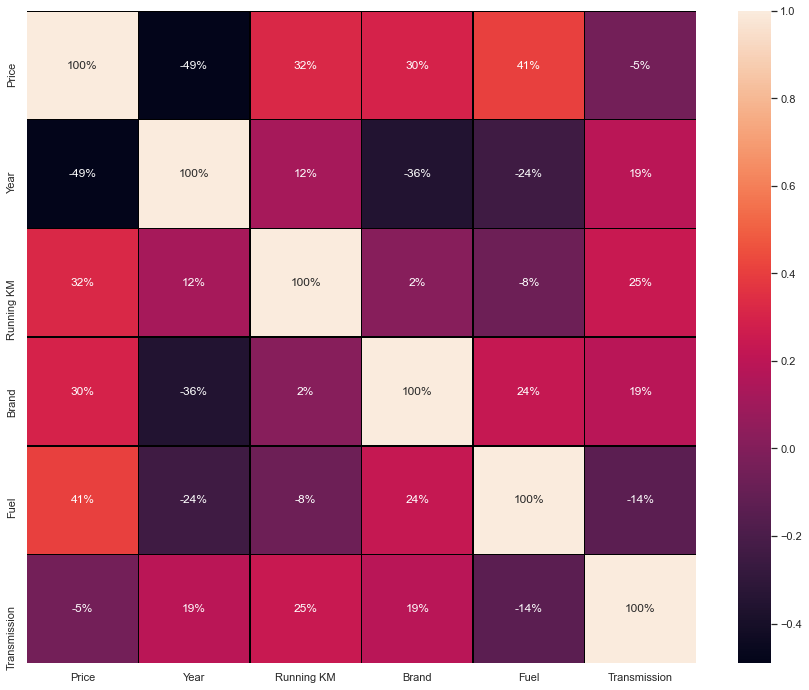

In [24]:
#Plotting heatmap for visualizing the correlation
plt.figure(figsize=(15,12))
sns.heatmap(corr,linewidth=0.5,linecolor='black',fmt='.0%',annot=True)
plt.show()

In [26]:
#checking the skewness
df1.skew()

Price           0.622329
Year           -1.498316
Running KM      0.301375
Brand           0.569237
Fuel           -1.185218
Transmission    1.960687
dtype: float64

In [27]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df1))   #converting all values into absolute values
threshold=3    #setting up a threshold
np.where(z>3)

(array([   1,   21,   41,   61,   81,  101,  121,  141,  161,  181,  201,
         221,  241,  261,  281,  301,  321,  341,  361,  381,  401,  421,
         441,  461,  481,  501,  521,  541,  561,  581,  601,  621,  641,
         661,  681,  701,  721,  741,  761,  781,  801,  821,  841,  861,
         881,  901,  921,  941,  961,  981, 1001, 1021, 1041, 1061, 1081,
        1101, 1121, 1141, 1161, 1181, 1201, 1221, 1241, 1261, 1281, 1301,
        1321, 1341, 1361, 1381, 1401, 1421, 1441, 1461, 1481, 1501, 1521,
        1541, 1561, 1581, 1601, 1621, 1641, 1661, 1681, 1701, 1721, 1741,
        1761, 1781, 1801, 1821, 1841, 1861, 1881, 1901, 1921, 1941, 1961,
        1981, 2001, 2021, 2041, 2061, 2081, 2101, 2121, 2141, 2161, 2181,
        2201, 2221, 2241, 2261, 2281, 2301, 2321, 2341, 2361, 2381, 2401,
        2421, 2441, 2461, 2481, 2501, 2521, 2541, 2561, 2581, 2601, 2621,
        2641, 2661, 2681, 2701, 2721, 2741, 2761, 2781, 2801, 2821, 2841,
        2861, 2881, 2901, 2921, 2941, 

In [29]:
#Removing outliers
df_new=df1[(z<3).all(axis=1)]
df_new

,Price,Year,Running KM,Brand,Fuel,Transmission
0,26925,2018,8015,6,2,0
2,26725,2020,24308,9,2,1
3,26400,2019,10849,1,2,0
4,26375,2018,21716,1,2,0
5,26275,2018,8865,1,2,0
...,...,...,...,...,...,...
9975,25500,2020,11605,5,2,0
9976,25500,2020,8307,3,2,0
9977,25425,2019,2743,4,2,0
9978,25425,2020,11250,5,1,0


In [30]:
#Original data dimensions
df.shape

(9980, 7)

In [31]:
#New data dimensions
df_new.shape

(9481, 6)

In [32]:
dfshape = 9980
dfnewshape = 9481
total = dfshape-dfnewshape
percentage_loss=((total)/dfshape)*100   
print(percentage_loss)

5.0


In [34]:
df_new

,Price,Year,Running KM,Brand,Fuel,Transmission
0,26925,2018,8015,6,2,0
2,26725,2020,24308,9,2,1
3,26400,2019,10849,1,2,0
4,26375,2018,21716,1,2,0
5,26275,2018,8865,1,2,0
...,...,...,...,...,...,...
9975,25500,2020,11605,5,2,0
9976,25500,2020,8307,3,2,0
9977,25425,2019,2743,4,2,0
9978,25425,2020,11250,5,1,0


In [35]:
# Splitting X and Y values.

x = df_new.drop(columns = ['Price'], axis = 1)
y = df_new['Price']

In [37]:
#Scaling the data for normalize the range of values to 0-1.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_sc = scaler.fit_transform(x)

# Model Building :

In [40]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import AdaBoostRegressor 

In [39]:
# Train test Split

x_train,x_test,y_train,y_test = train_test_split(x_sc,y, test_size = 0.20, random_state = 555)

In [41]:
#RandomForestRegressor Algorithm
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)
scr_rfr = cross_val_score(rfr,x,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_rfr.mean())
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Train Score", rfr.score(x_train,y_train))
print("Test Score", rfr.score(x_test,y_test))

r2_Score 1.0
CV Score 1.0
MSE 0.0
RMSE 0.0
Train Score 1.0
Test Score 1.0


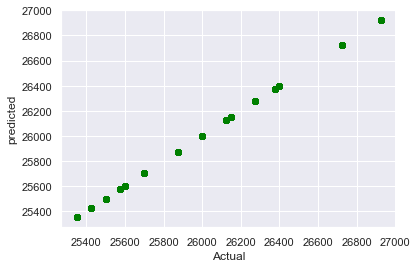

In [42]:
plt.scatter(y_test,y_pred, color = 'green')      #Scatter Matrix for Actual VS predicted for the model
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()

In [43]:
#KNeighborsRegressor Algorithm

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 5)
knr.fit(x_train,y_train)
y_pred = knr.predict(x_test)
scr_knr = cross_val_score(knr,x,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_knr.mean())
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Train Score", knr.score(x_train,y_train))
print("Test Score", knr.score(x_test,y_test))

r2_Score 1.0
CV Score 1.0
MSE 0.0
RMSE 0.0
Train Score 1.0
Test Score 1.0


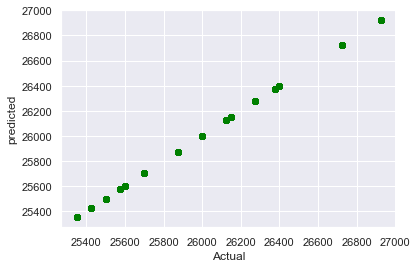

In [44]:
plt.scatter(y_test,y_pred, color = 'green')      #Scatter Matrix for Actual VS predicted for the model
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()

In [45]:
#GradientBoostRegressor Algorithm

from sklearn.ensemble import GradientBoostingRegressor 
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)
scr_gbr = cross_val_score(gbr,x,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_gbr.mean())
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Train Score", gbr.score(x_train,y_train))
print("Test Score", gbr.score(x_test,y_test))

r2_Score 0.9999286076335294
CV Score 0.9999472023945735
MSE 15.300643656442613
RMSE 3.9116037192490003
Train Score 0.9999295765220567
Test Score 0.9999286076335294


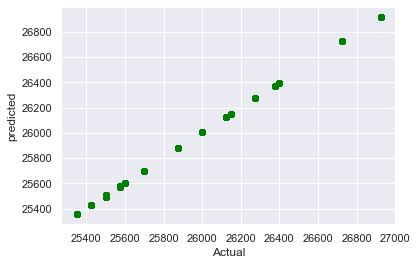

In [46]:
plt.scatter(y_test,y_pred, color = 'green')      #Scatter Matrix for Actual VS predicted for the model
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()

In [48]:
# AdaBoostRegressor Algorithm

from sklearn.ensemble import AdaBoostRegressor 
abr = AdaBoostRegressor()
abr.fit(x_train, y_train)
y_pred = abr.predict(x_test)
scr_abr = cross_val_score(abr,x,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_abr.mean())
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Train Score", abr.score(x_train,y_train))
print("Test Score", abr.score(x_test,y_test))

r2_Score 0.9746734852134424
CV Score 0.9785465097759065
MSE 5427.9189353970005
RMSE 73.67441167323292
Train Score 0.9731772877362009
Test Score 0.9746734852134424


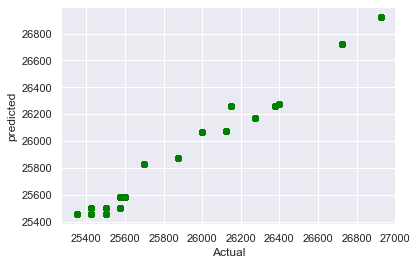

In [49]:
plt.scatter(y_test,y_pred, color = 'green')      #Scatter Matrix for Actual VS predicted for the model
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()

As we can see that random forest and KNeighbors are having high accuracy of 100%.

Let's apply hyper parameter tuning for RANDOM FOREST Model.

# Hyperparameter Tuning :

In [52]:
from sklearn.model_selection import GridSearchCV

In [50]:
#Creating parameter list to pass in GridSearchCV
parameters={'criterion':['mse','mae'],
            'n_estimators':[40,60,80,100],
            'max_features':['auto','sqrt','log2']}

In [53]:
#Using GridSearchCV to run the parameters and checking final accuracy
rfr=RandomForestRegressor()
grid=GridSearchCV(rfr,parameters,cv=5,scoring='r2')
grid.fit(x_train,y_train)
print(grid.best_params_) #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'criterion': 'mse', 'max_features': 'auto', 'n_estimators': 40}
1.0


In [59]:
#Using the best parameters obtained
RF=RandomForestRegressor(random_state=48, n_estimators=40, criterion='mse', max_features='auto')
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
print('r2_score: ',r2_score(y_test,pred))

r2_score:  1.0


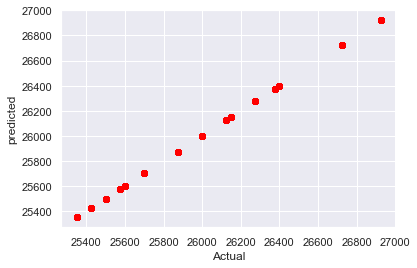

In [60]:
plt.scatter(y_test,pred, color = 'red')      #Scatter Matrix for Actual VS predicted for the model
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()

# Finalizing the model :

In [61]:
rf_prediction=RF.predict(x)
print('Predictions of Random Forest Regressor: ',rf_prediction)

Predictions of Random Forest Regressor:  [26458.75 26725.   26925.   ... 26458.75 26458.75 26725.  ]


In [62]:
#Comparing actual and predicted values with the help of a dataframe
predictions=pd.DataFrame({'Original_price':y, 'Predicted_price':rf_prediction})
predictions

,Original_price,Predicted_price
0,26925,26458.75
2,26725,26725.00
3,26400,26925.00
4,26375,26925.00
5,26275,26925.00
...,...,...
9975,25500,26458.75
9976,25500,26458.75
9977,25425,26458.75
9978,25425,26458.75


# Saving the model :

In [65]:
# Saving the model

import joblib
joblib.dump(RF,"UsedCar_Price.pkl")

['UsedCar_Price.pkl']